<a href="https://colab.research.google.com/github/charlie-aashutosh/Machine-Learning/blob/master/Decision_Trees_BankNote_Authenticity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as snr

In [2]:
df=pd.read_csv("/content/BankNote_Authentication.xls")

In [3]:
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


We want to see the relationship between the different features in our dataset. To do so, we used the “pairplot()” function from the Seaborn library. The function takes dataset as a parameter and plots a graph that contains relationships between all the features in the dataset as shown

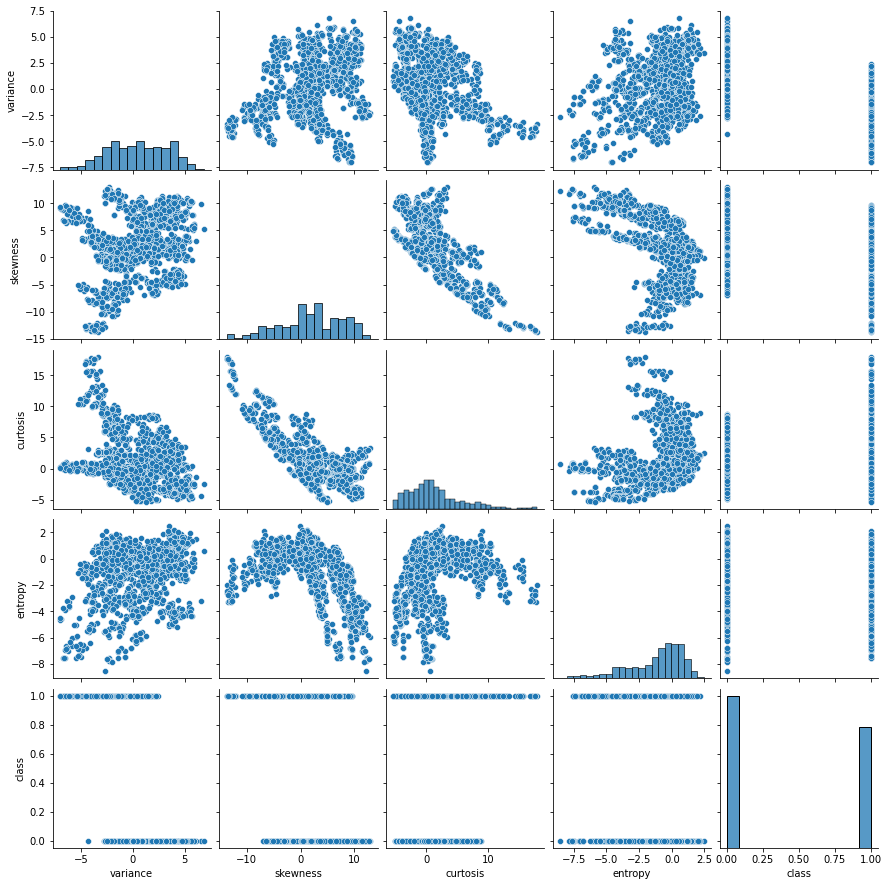

In [11]:
snr.pairplot(df)

Now we will divide our data into attributes and labels and will then divide the resultant data into both training and test sets. By doing this we can train our algorithm on one set of data and then test it out on a completely different set of data that the algorithm hasn't seen yet. This provides you with a more accurate view of how your trained algorithm will actually perform.

In [13]:
dataset_features = df.iloc[:, 0:4].values

In [14]:
dataset_labels = df.iloc[:, 4].values 


The "iloc" function takes the index that we want to filter from our dataset,
in the first line we filtered column 0 to column 3 that contain our feature set.
In the second row, we only filtered records from column four which contains the 
labels (class)

In the code below, the test_size parameter specifies the ratio of the test set, which we use to split up 20% of the data in to the test set and 80% for training.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21) 

The fit method of this class is called to train the algorithm on the training data, which is passed as parameter to the fit method

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now that our classifier has been trained, let's make predictions on the test data. To make predictions, the predict method of the DecisionTreeClassifier class is used. 

In [20]:
y_pred = classifier.predict(X_test)


 Now we'll see how accurate our algorithm is. For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[148   5]
 [  2 120]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.96      0.98      0.97       122

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.97      0.97      0.97       275



From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 4. This is 98.5 % accuracy. Not too bad!